In [1]:
import os

In [2]:
os.chdir('.\\all_results')

In [3]:
from collections import defaultdict

In [4]:
results = defaultdict(lambda: defaultdict(dict))

In [5]:
import json

In [6]:
for d in os.listdir():
    dir_name = d.split('_')
    lang = dir_name[0]
    file_part = dir_name[1].split('-')[-1]
    category = dir_name[2]
    dk = '_'.join(dir_name[:3])
    file_path = '.\\' + d + '\\' + 'log.json'
    with open(file_path, mode='r', encoding='utf-8') as f:
        res = json.load(f)
    test_res = res[dk]['results']['test_score']
    accuracies = [score[0] for score in test_res.values()]
    number_of_values = len(res[dk]['results']['encoded_labels'])
    #print(number_of_values)
    if number_of_values != 1 and lang != 'gub':
        results[lang][file_part][category] = (accuracies, number_of_values)

In [7]:
import matplotlib.pyplot as plt

In [8]:
from math import ceil

In [9]:
import numpy as np

In [21]:
results['en']['train'].keys()

dict_keys(['Case', 'Definite', 'Degree', 'Gender', 'Number', 'NumType', 'Person', 'Tense', 'VerbForm'])

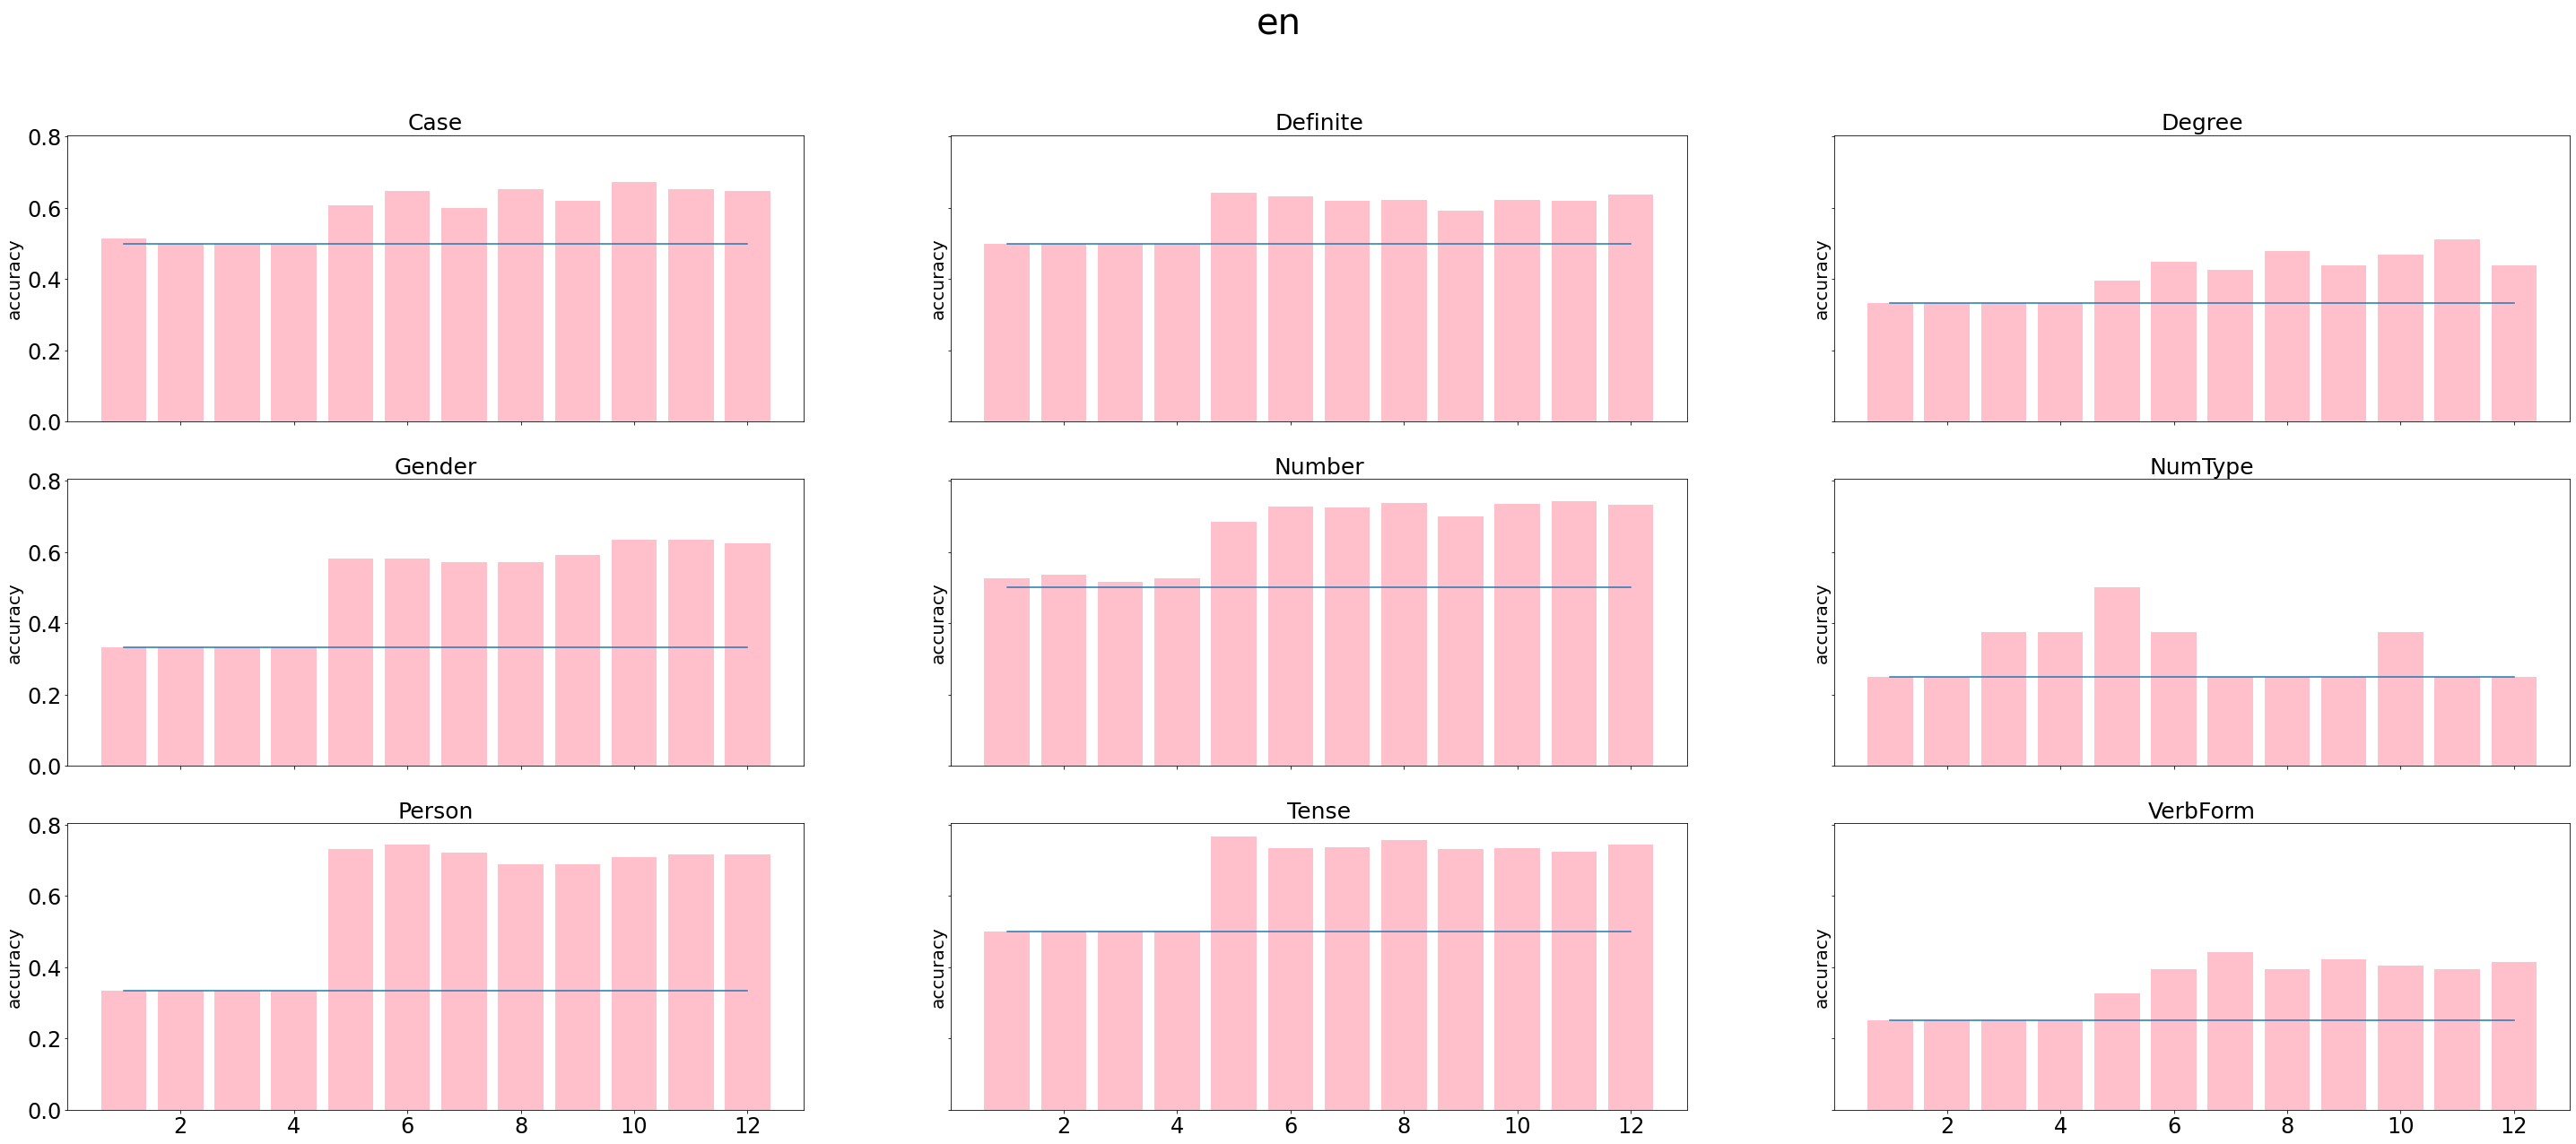

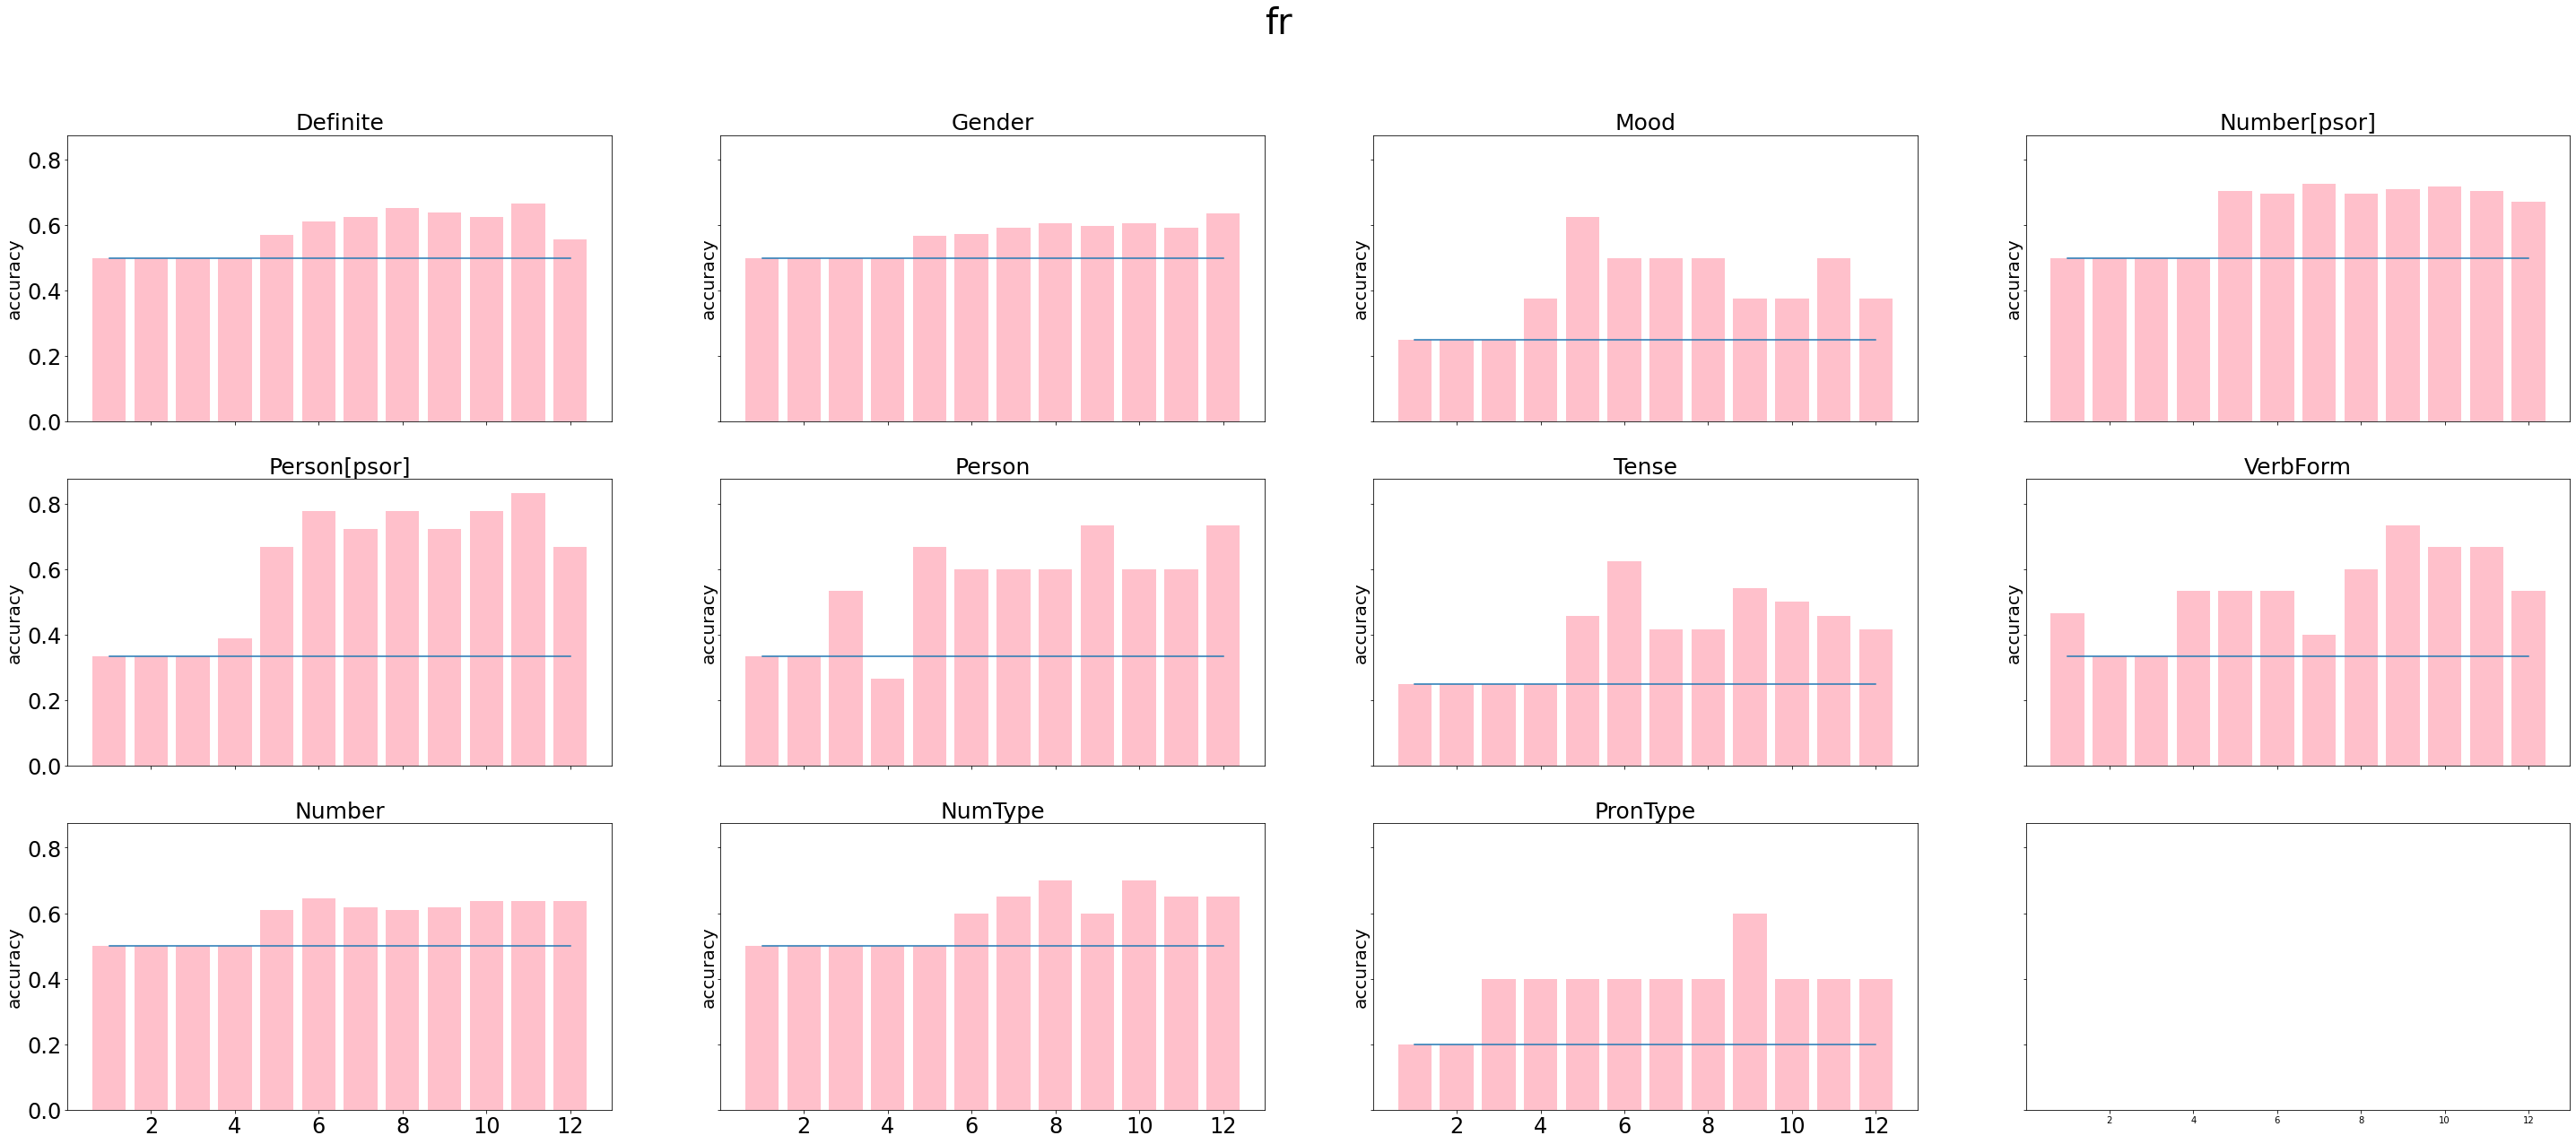

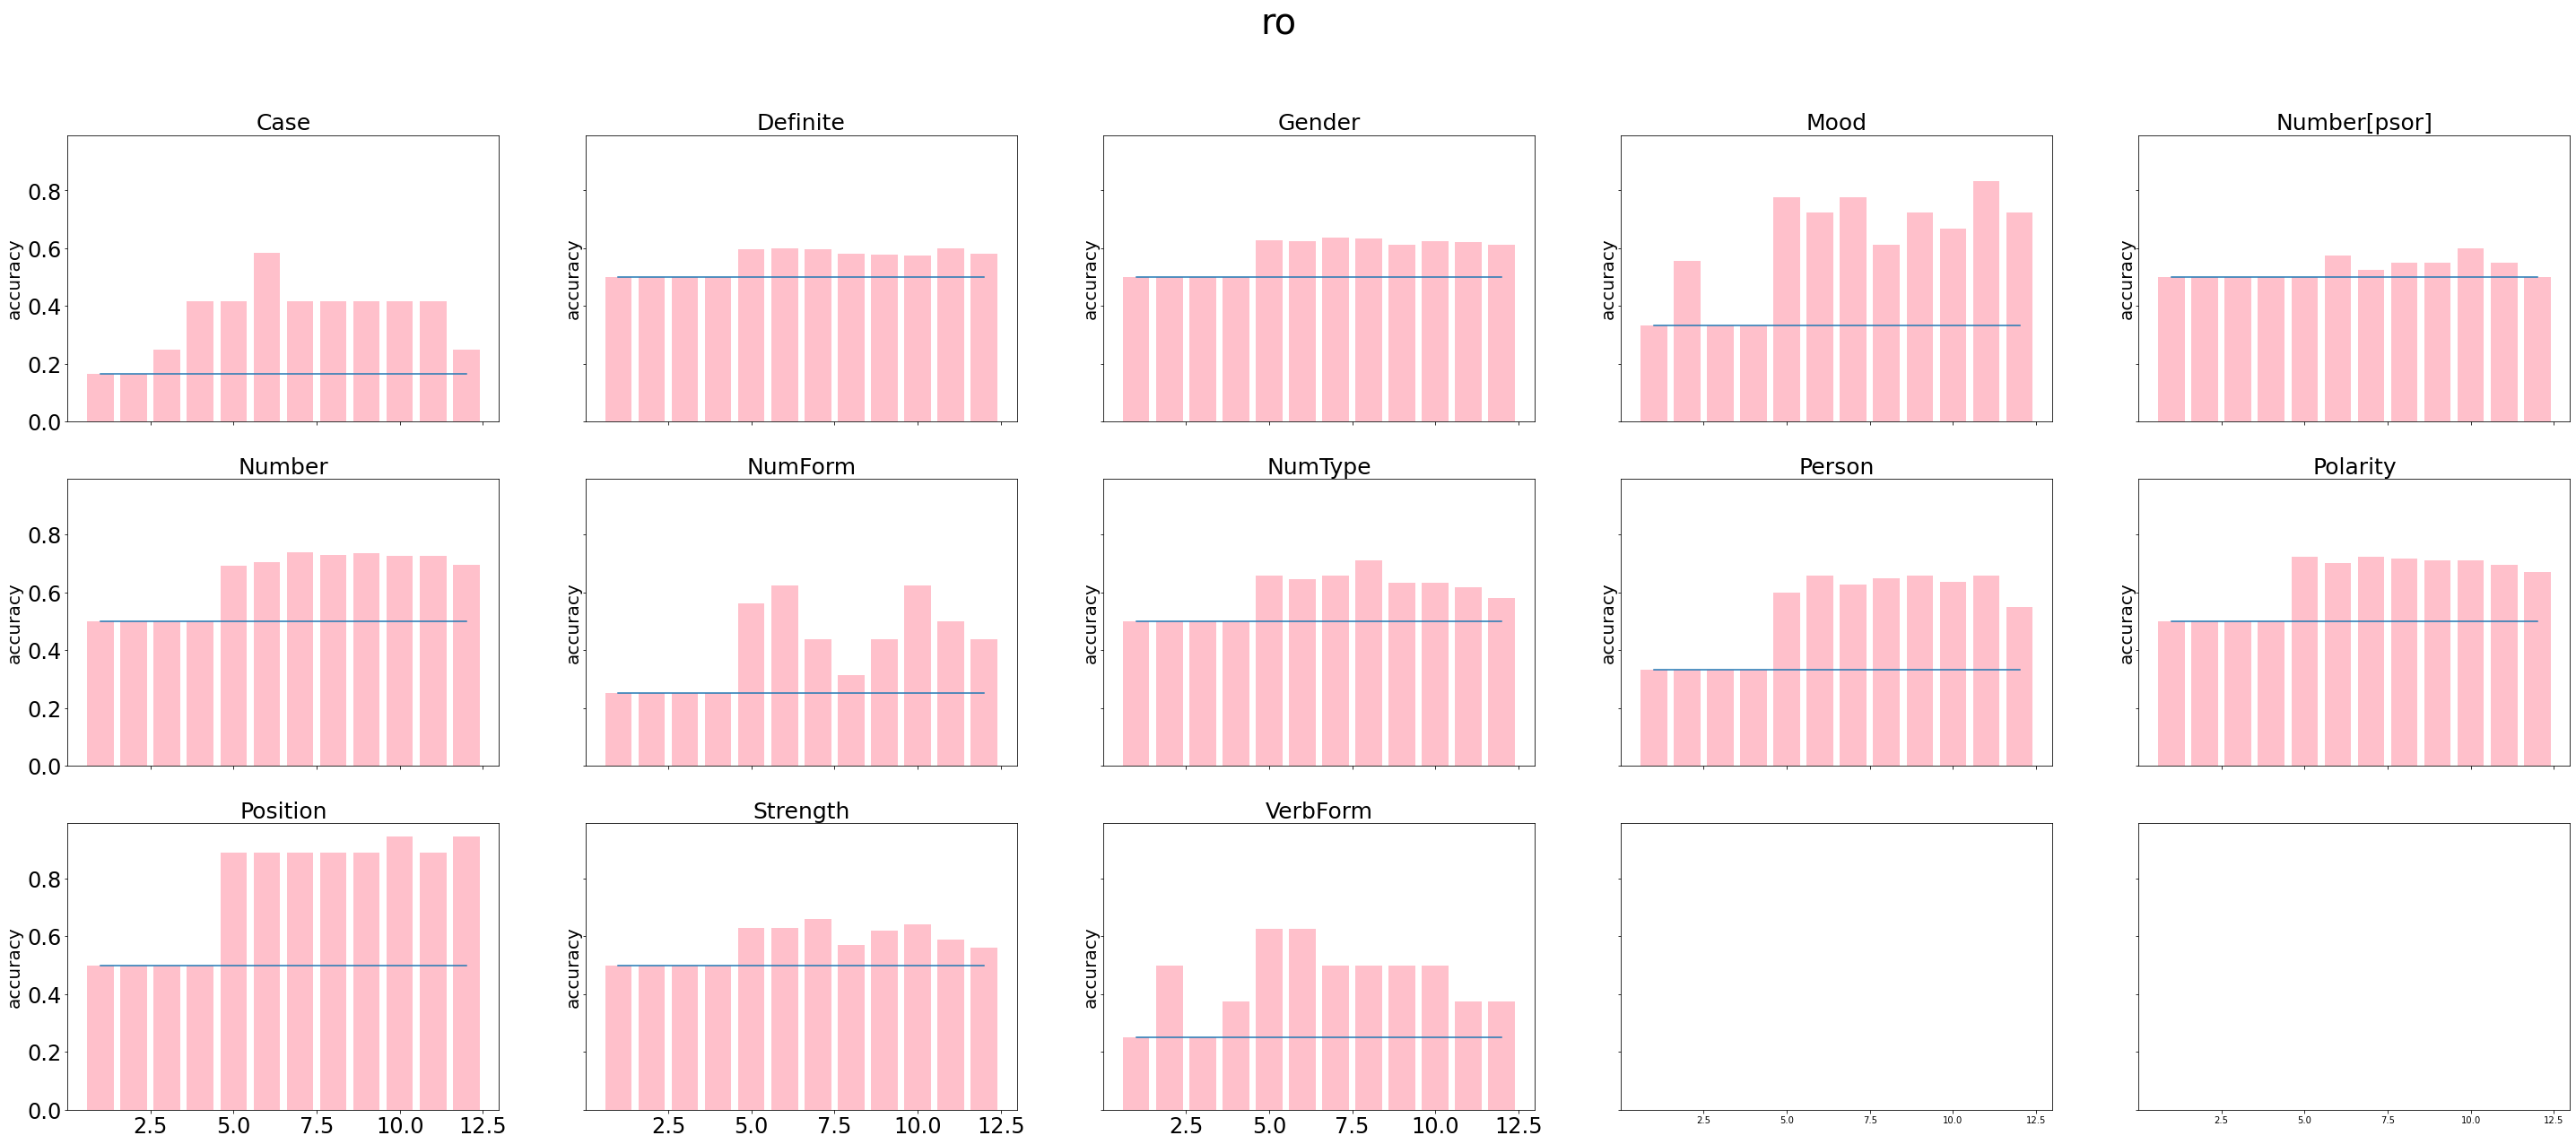

MemoryError: In RendererAgg: Out of memory

<Figure size 3600x1440 with 12 Axes>

In [18]:
for lang in results:
    if 'train' in results[lang].keys():
        p = 'train'
    elif 'dev' in results[lang].keys():
        p = 'dev'
    else:
        p = 'test'
    nfeats = len(results[lang][p].values())
    nc = ceil(nfeats / 3)
    fig, ax = plt.subplots(figsize=(50,20), nrows=3, ncols=nc, sharey=True, sharex=True)
    i = 0
    x = list(range(1, 13))
    fig.suptitle(lang, fontsize=40)
    for cat in results[lang][p]:
        r, c = i // nc, i % nc
        y = results[lang][p][cat][0]
        rand = np.full((12,), 1 / results[lang][p][cat][1])
        ax[r, c].plot(x, rand)
        ax[r, c].bar(x, y, color=['pink'])
        ax[r, c].set_title(cat, fontsize=25)
        #ax[r, c].set_xlabel('layers', fontsize=20)
        ax[r, c].set_ylabel('accuracy', fontsize=20)
        ax[r, c].tick_params(axis = 'both', which = 'major', labelsize = 24)
        i += 1

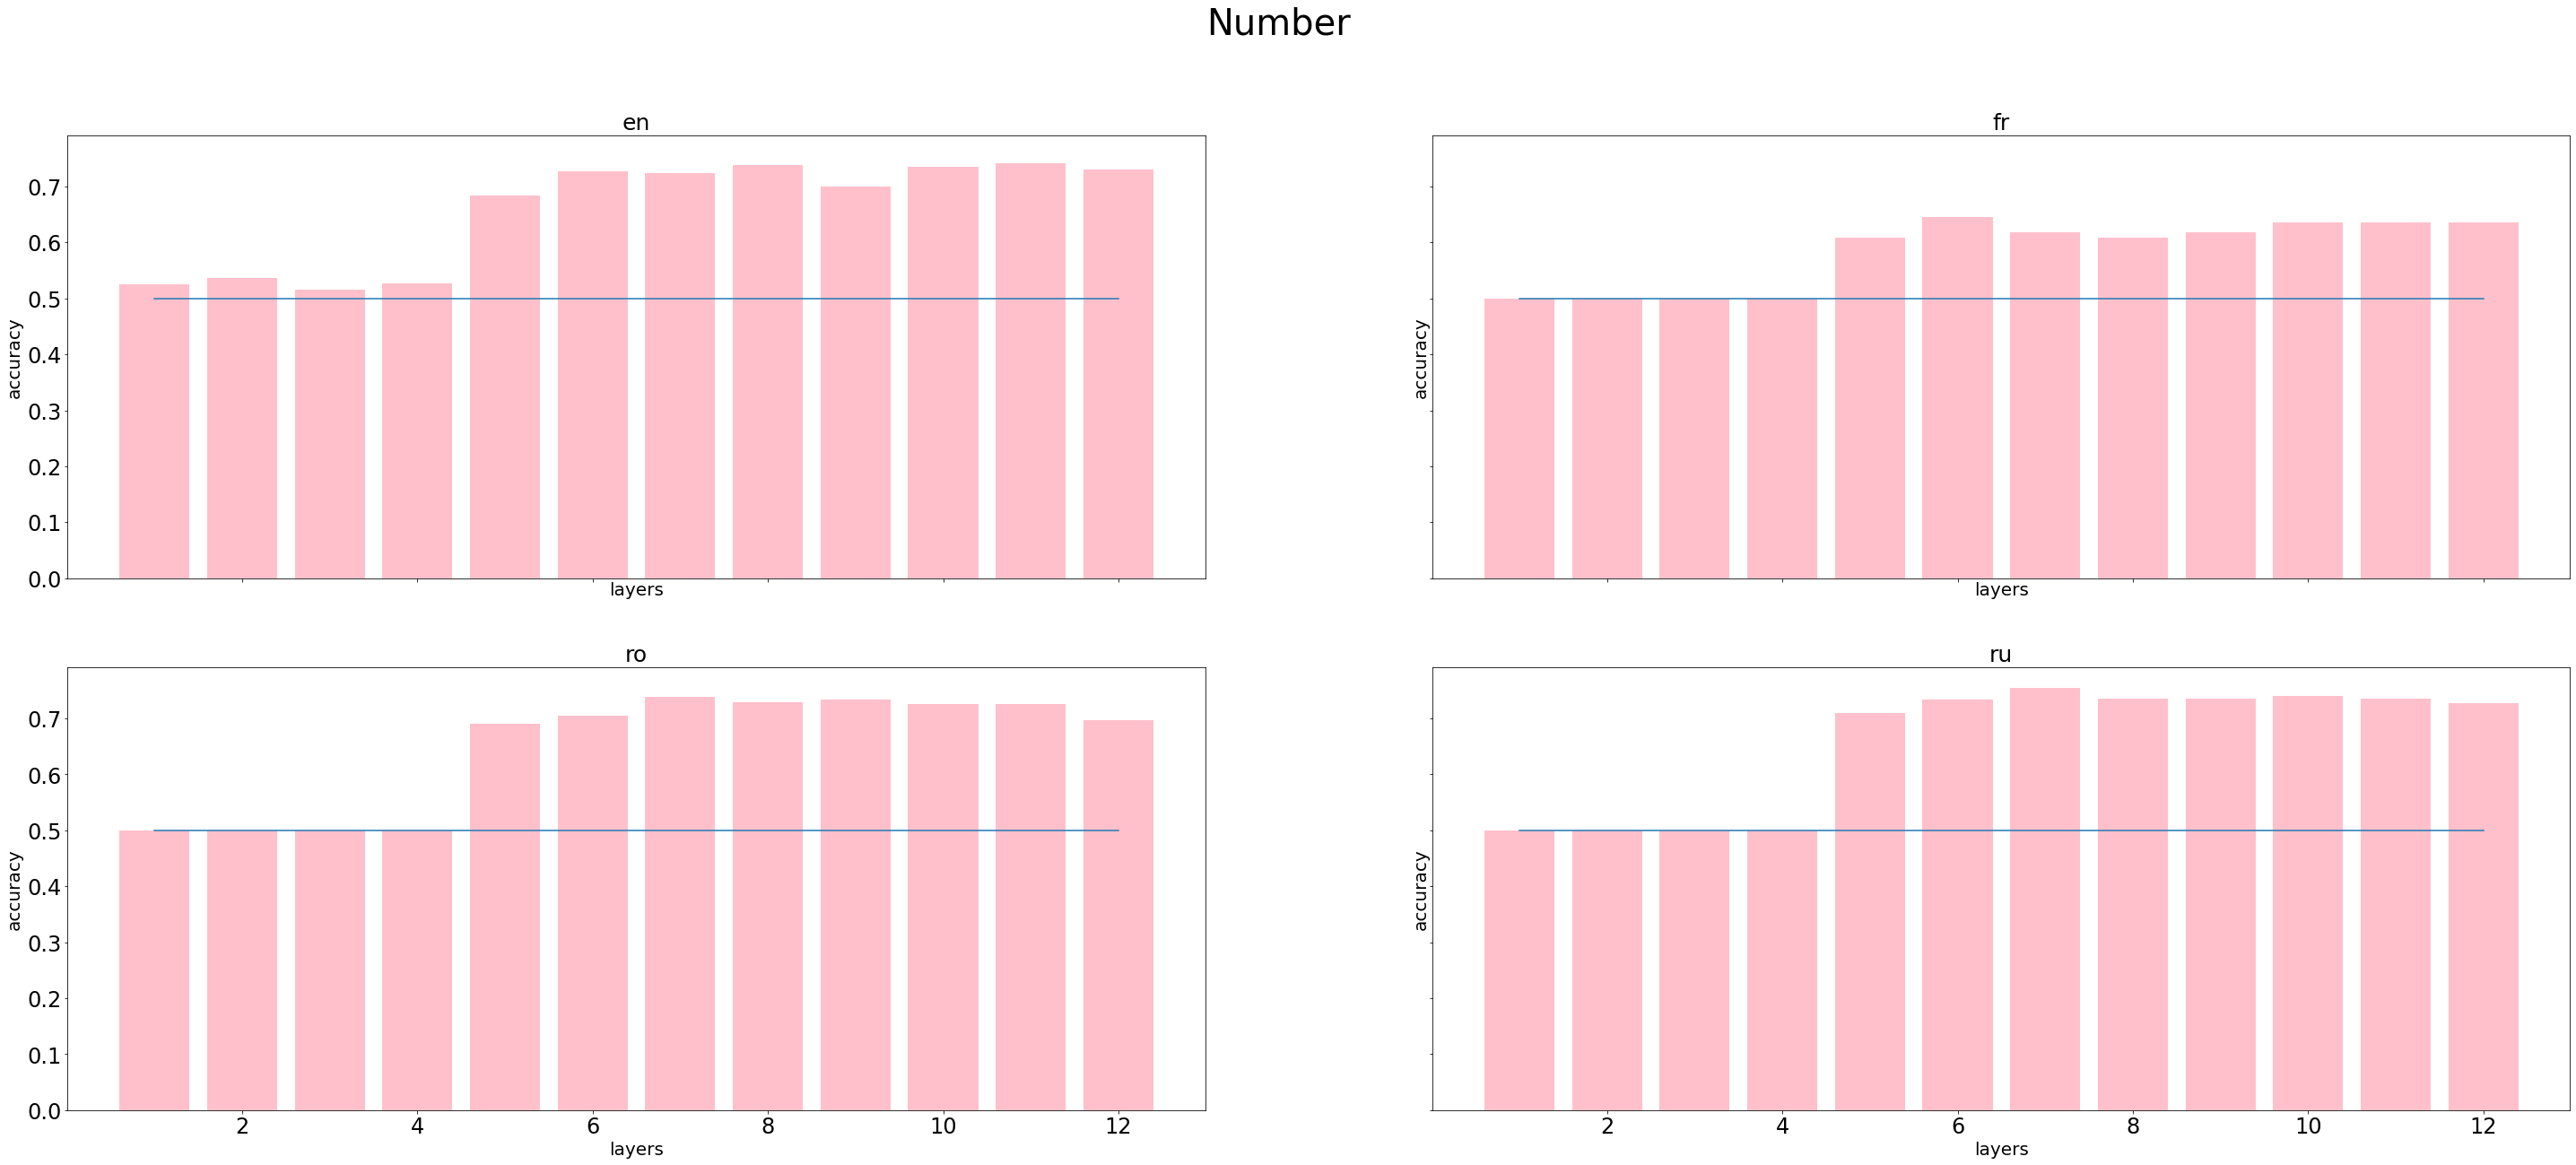

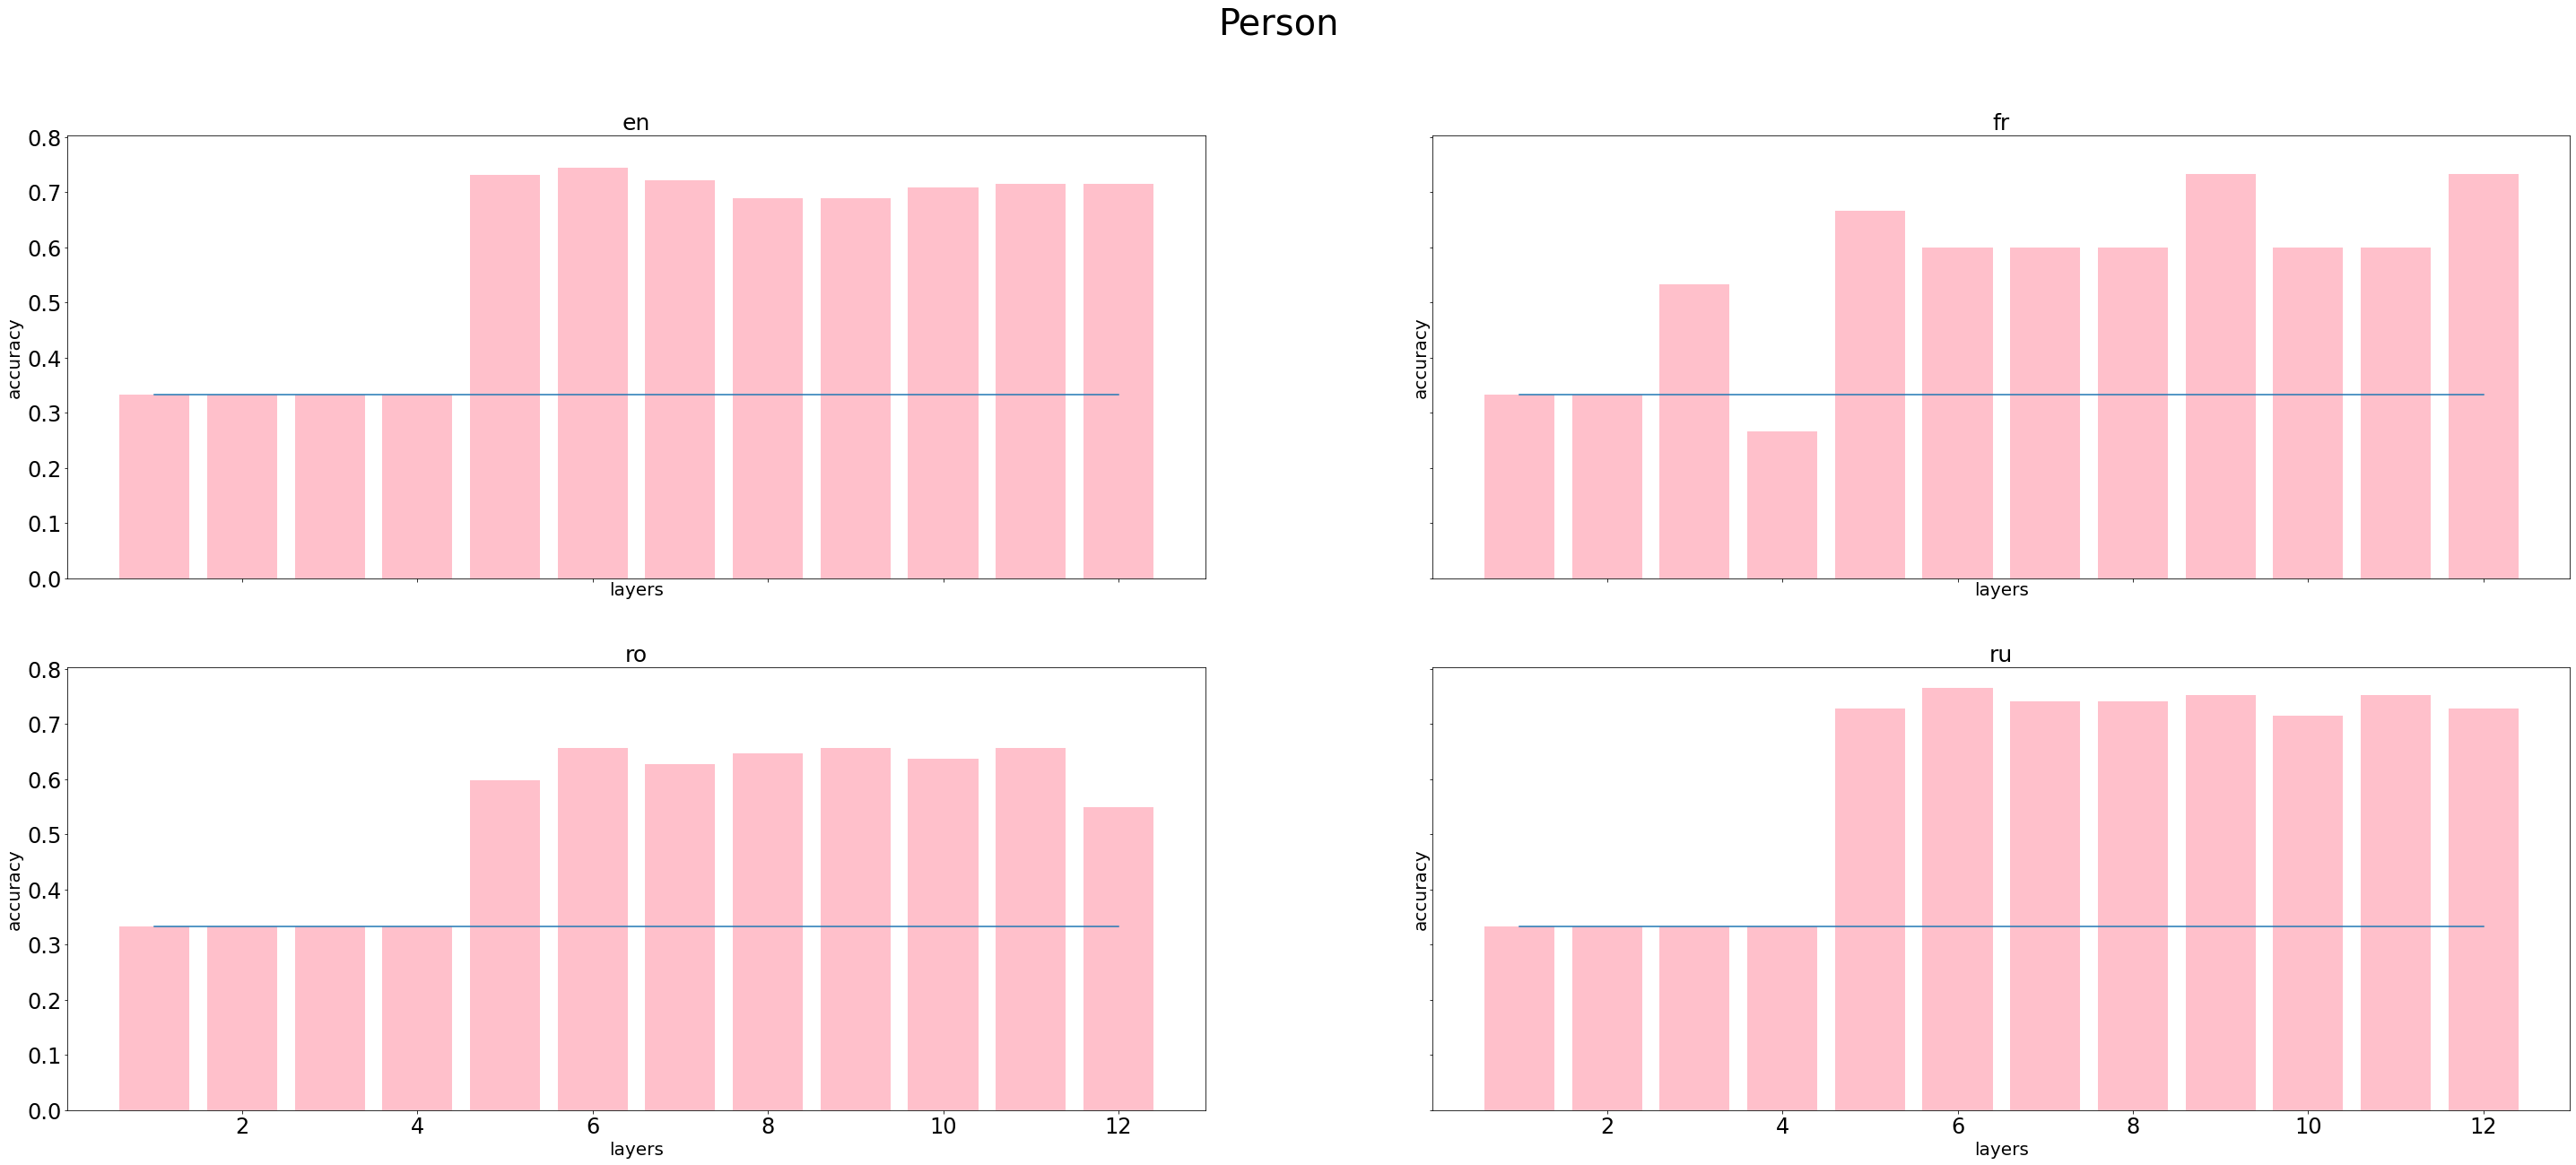

In [20]:
categories = ['Number', 'Person']
x = list(range(1, 13))
for cat in categories:
    fig, ax = plt.subplots(figsize=(50,20), nrows=2, ncols=2, sharey=True, sharex=True)
    fig.suptitle(cat, fontsize=40)
    i = 0
    for lang in results:
        if 'train' in results[lang].keys():
            p = 'train'
        elif 'dev' in results[lang].keys():
            p = 'dev'
        else:
            p = 'test'
        r, c = i // 2, i % 2
        y = results[lang][p][cat][0]
        rand = np.full((12,), 1 / results[lang][p][cat][1])
        ax[r, c].plot(x, rand, color=['grey'])
        ax[r, c].bar(x, y, color=['#00bfa2'])
        ax[r, c].set_title(lang, fontsize=25)
        ax[r, c].set_xlabel('layers', fontsize=20)
        ax[r, c].set_ylabel('accuracy', fontsize=20)
        ax[r, c].tick_params(axis = 'both', which = 'major', labelsize = 24)
        i += 1

<ipython-input-27-2a218b84991e>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,3))


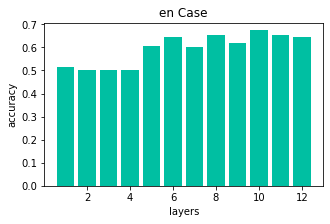

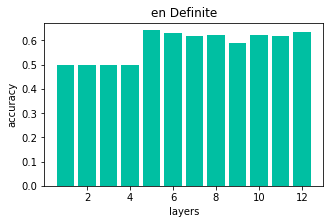

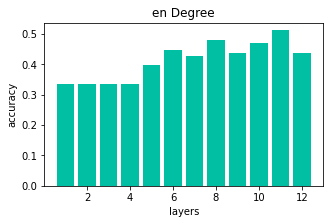

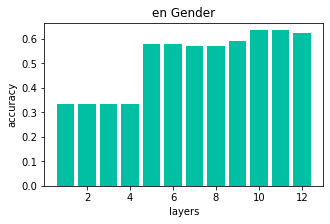

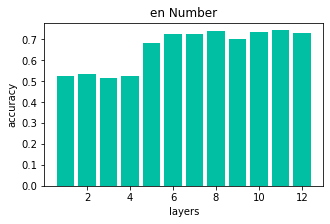

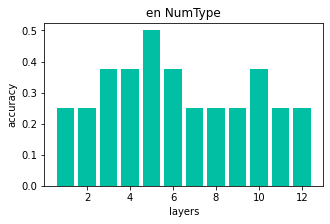

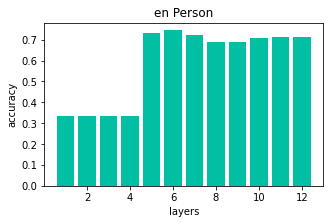

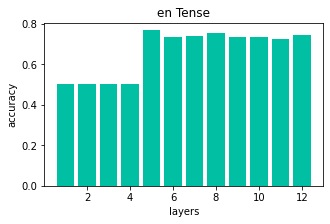

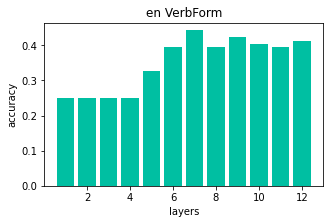

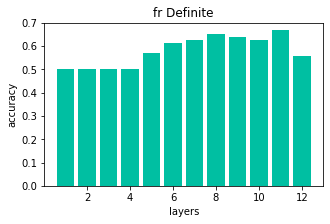

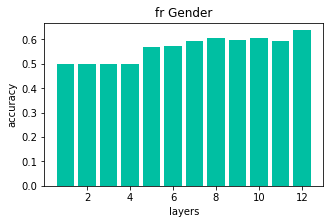

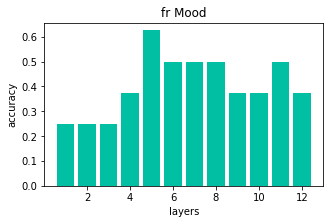

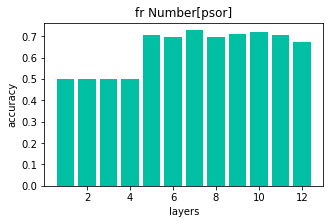

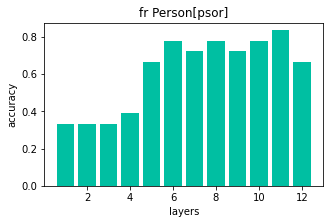

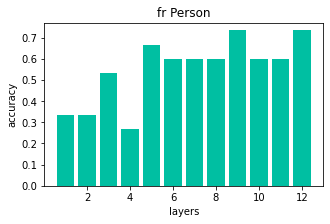

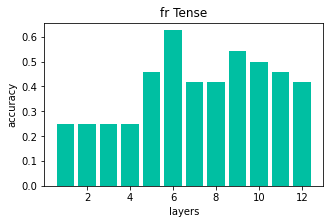

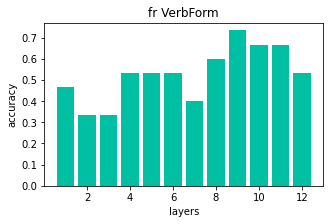

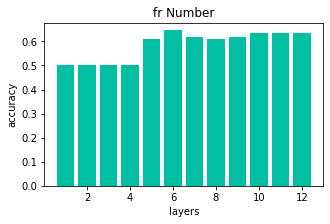

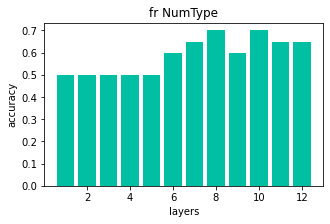

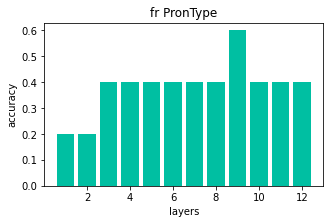

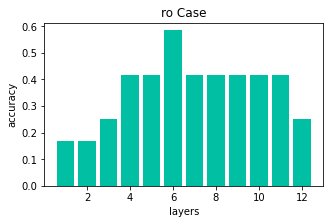

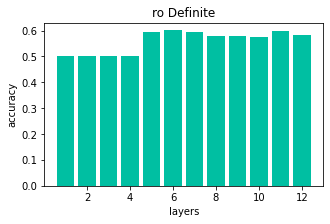

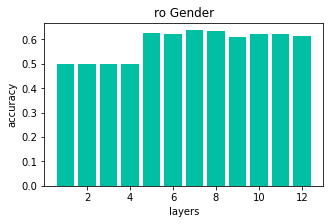

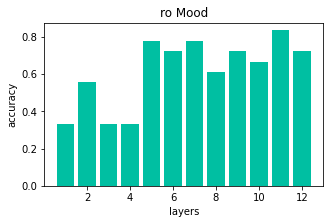

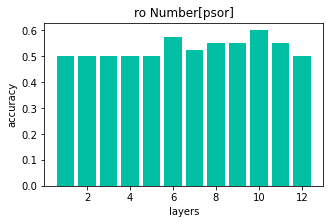

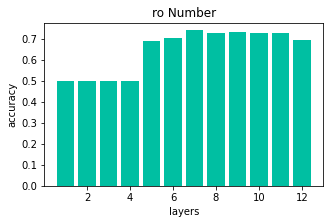

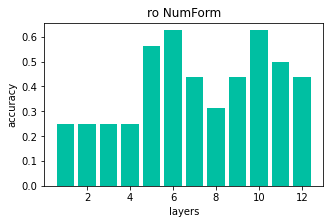

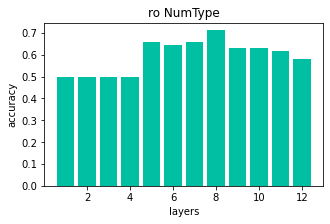

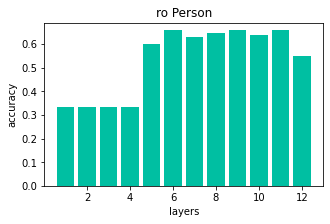

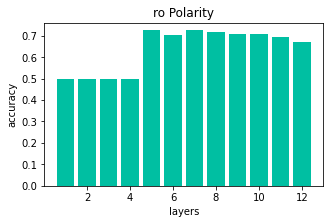

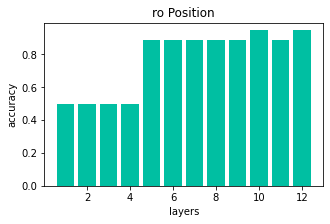

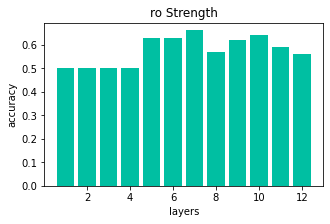

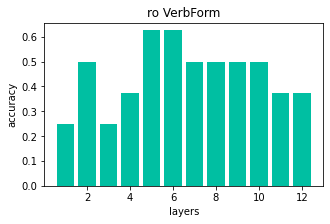

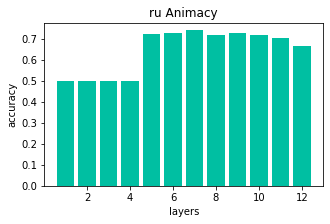

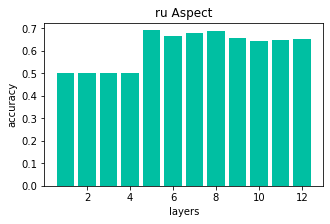

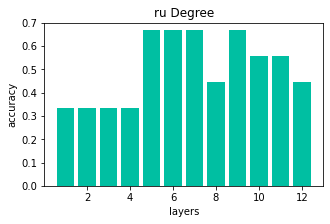

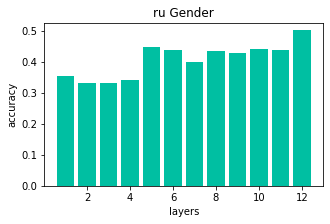

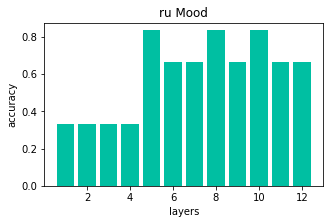

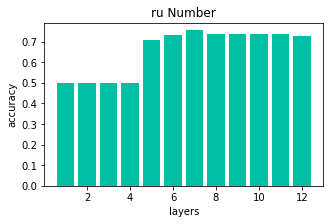

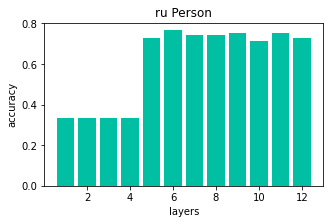

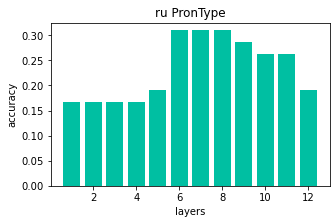

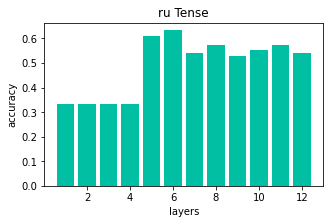

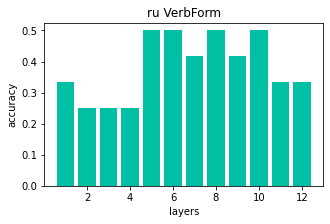

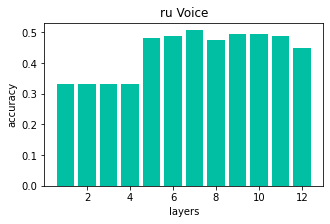

In [27]:
for lang in results:
    if 'train' in results[lang].keys():
        p = 'train'
    elif 'dev' in results[lang].keys():
        p = 'dev'
    else:
        p = 'test'
    nfeats = len(results[lang][p].values())
    
    x = list(range(1, 13))
    #fig.suptitle(lang, fontsize=40)
    for cat in results[lang][p]:
        fig, ax = plt.subplots(figsize=(5,3))
        y = results[lang][p][cat][0]
        rand = np.full((12,), 1 / results[lang][p][cat][1])
        #plt.plot(x, rand, color=['grey'])
        ax.bar(x, y, color=['#00bfa2'])
        ax.set_title(lang + ' ' + cat)
        ax.set_ylabel('accuracy')
        ax.set_xlabel('layers')
        ax.tick_params(axis = 'both', which = 'major')

In [12]:
all_feats = []
for lang in results:
    if 'train' in results[lang].keys():
        p = 'train'
    elif 'dev' in results[lang].keys():
        p = 'dev'
    else:
        p = 'test'
    feats = results[lang][p].keys()
    all_feats.append(feats)
all_feats

[dict_keys(['Case', 'Definite', 'Degree', 'Gender', 'Number', 'NumType', 'Person', 'Tense', 'VerbForm']),
 dict_keys(['Definite', 'Gender', 'Mood', 'Number[psor]', 'Person[psor]', 'Person', 'Tense', 'VerbForm', 'Number', 'NumType', 'PronType']),
 dict_keys(['Case', 'Definite', 'Gender', 'Mood', 'Number[psor]', 'Number', 'NumForm', 'NumType', 'Person', 'Polarity', 'Position', 'Strength', 'VerbForm']),
 dict_keys(['Animacy', 'Aspect', 'Degree', 'Gender', 'Mood', 'Number', 'Person', 'PronType', 'Tense', 'VerbForm', 'Voice'])]

In [13]:
common_feats = set(all_feats[0])

In [14]:
common_feats = common_feats.intersection(*all_feats)

In [15]:
common_feats

{'Gender', 'Number', 'Person', 'VerbForm'}

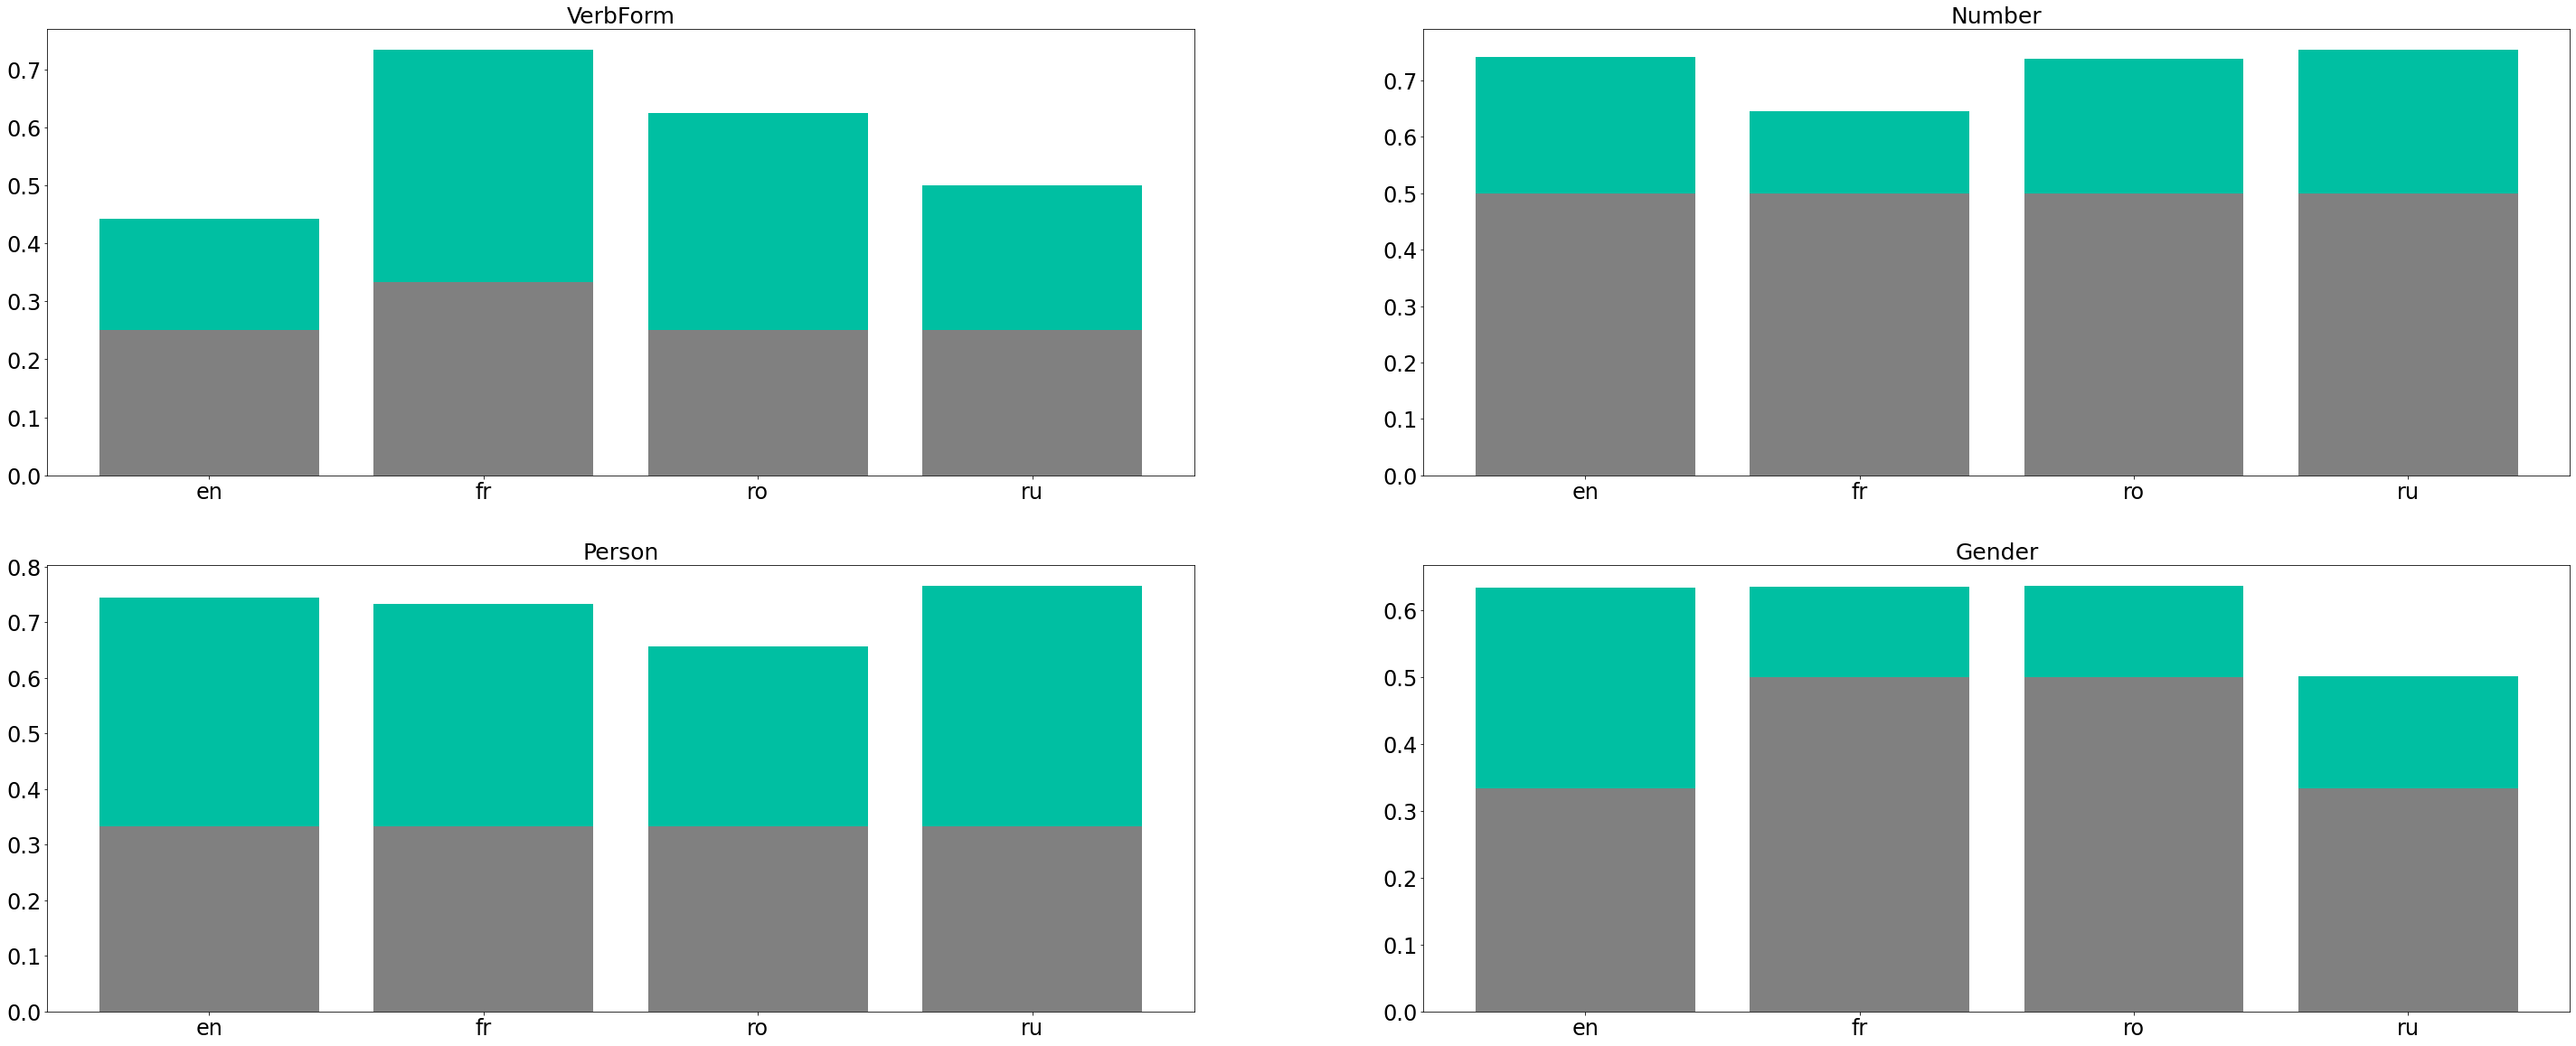

In [17]:
fig, ax = plt.subplots(figsize=(50,20), nrows=2, ncols=2)
i = 0
for f in common_feats:
    r, c = i // 2, i % 2
    x = list(results.keys())
    best_acc = []
    guess = []
    for lang in results:
        if 'train' in results[lang].keys():
            p = 'train'
        elif 'dev' in results[lang].keys():
            p = 'dev'
        else:
            p = 'test'
        best_acc.append(max(results[lang][p][f][0]))
        guess.append(1 / results[lang][p][f][1])
    
    ax[r, c].bar(x, best_acc, color=['#00bfa2'])
    ax[r, c].bar(x, guess, color=['grey'])
    ax[r, c].tick_params(axis = 'both', which = 'major', labelsize = 24)
    ax[r, c].set_title(f, fontsize=25)
    i += 1